In [1]:
from optiland import optic, analysis, optimization, wavefront
import numpy as np

In [2]:
lens = optic.Optic()

lens.surface_group.surfaces = []

lens.add_surface(index=0, thickness=np.inf)
lens.add_surface(index=1, thickness=5, radius=100, is_stop=True, material='N-SF11')
lens.add_surface(index=2, thickness=59, radius=-1000)
lens.add_surface(index=3)

# add aperture
lens.set_aperture(aperture_type='EPD', value=25.4)

# add field
lens.set_field_type(field_type='angle')
lens.add_field(y=0.0)
lens.add_field(y=0.7)
lens.add_field(y=1.0)

# add wavelength
lens.add_wavelength(value=0.4861)
lens.add_wavelength(value=0.5876, is_primary=True)
lens.add_wavelength(value=0.6563)

lens.update_paraxial()

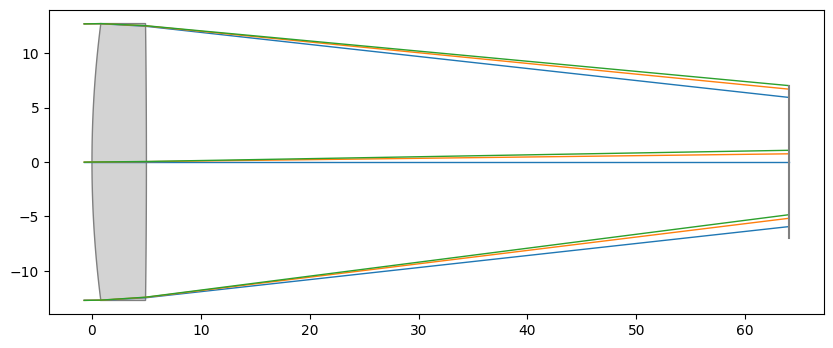

In [3]:
lens.draw()

In [4]:
problem = optimization.OptimizationProblem()

for wave in lens.wavelengths.get_wavelengths():
    for field in lens.fields.get_field_coords():
        input_data = {'optic': lens, 'Hx': field[0], 'Hy': field[1], 'num_rays': 3, 'wavelength': wave, 'distribution': 'gaussian_quad'}
        problem.add_operand(operand_type='OPD_difference', target=0, weight=1, input_data=input_data)

problem.add_operand(operand_type='f2', target=100, weight=10, input_data={'optic': lens})

problem.add_variable(lens, 'thickness', surface_number=2, min_val=0, max_val=1000)
problem.add_variable(lens, 'radius', surface_number=1, min_val=-1000, max_val=1000)
problem.add_variable(lens, 'radius', surface_number=2, min_val=-1000, max_val=1000)

problem.info()

+----+------------------------+-------------------+
|    |   Merit Function Value |   Improvement (%) |
|----+------------------------+-------------------|
|  0 |                 221205 |                 0 |
+----+------------------------+-------------------+
+----+----------------+----------+----------+----------+----------+--------------------+
|    | Operand Type   |   Target |   Weight |    Value |    Delta |   Contribution (%) |
|----+----------------+----------+----------+----------+----------+--------------------|
|  0 | OPD difference |        0 |        1 | 261.974  | 261.974  |           31.0256  |
|  1 | OPD difference |        0 |        1 |  87.3545 |  87.3545 |            3.44965 |
|  2 | OPD difference |        0 |        1 |  87.3926 |  87.3926 |            3.45267 |
|  3 | OPD difference |        0 |        1 | 223.692  | 223.692  |           22.6208  |
|  4 | OPD difference |        0 |        1 |  74.5947 |  74.5947 |            2.51548 |
|  5 | OPD difference |     

In [5]:
# optimizer = optimization.OptimizerGeneric(problem)
# optimizer = optimization.DualAnnealing(problem)
optimizer = optimization.LeastSquares(problem)
res = optimizer.optimize()

In [6]:
problem.info()

+----+------------------------+-------------------+
|    |   Merit Function Value |   Improvement (%) |
|----+------------------------+-------------------|
|  0 |                109.776 |           99.9504 |
+----+------------------------+-------------------+
+----+----------------+----------+----------+-----------+------------+--------------------+
|    | Operand Type   |   Target |   Weight |     Value |      Delta |   Contribution (%) |
|----+----------------+----------+----------+-----------+------------+--------------------|
|  0 | OPD difference |        0 |        1 |   6.73512 | 6.73512    |        41.322      |
|  1 | OPD difference |        0 |        1 |   2.26751 | 2.26751    |         4.6837     |
|  2 | OPD difference |        0 |        1 |   2.29089 | 2.29089    |         4.7808     |
|  3 | OPD difference |        0 |        1 |   3.23528 | 3.23528    |         9.53484    |
|  4 | OPD difference |        0 |        1 |   1.05986 | 1.05986    |         1.02326    |
|  5

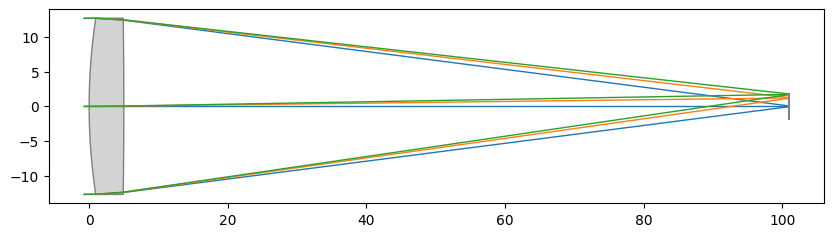

In [7]:
lens.draw() 

In [8]:
lens.paraxial.f2()

100.00654748480108

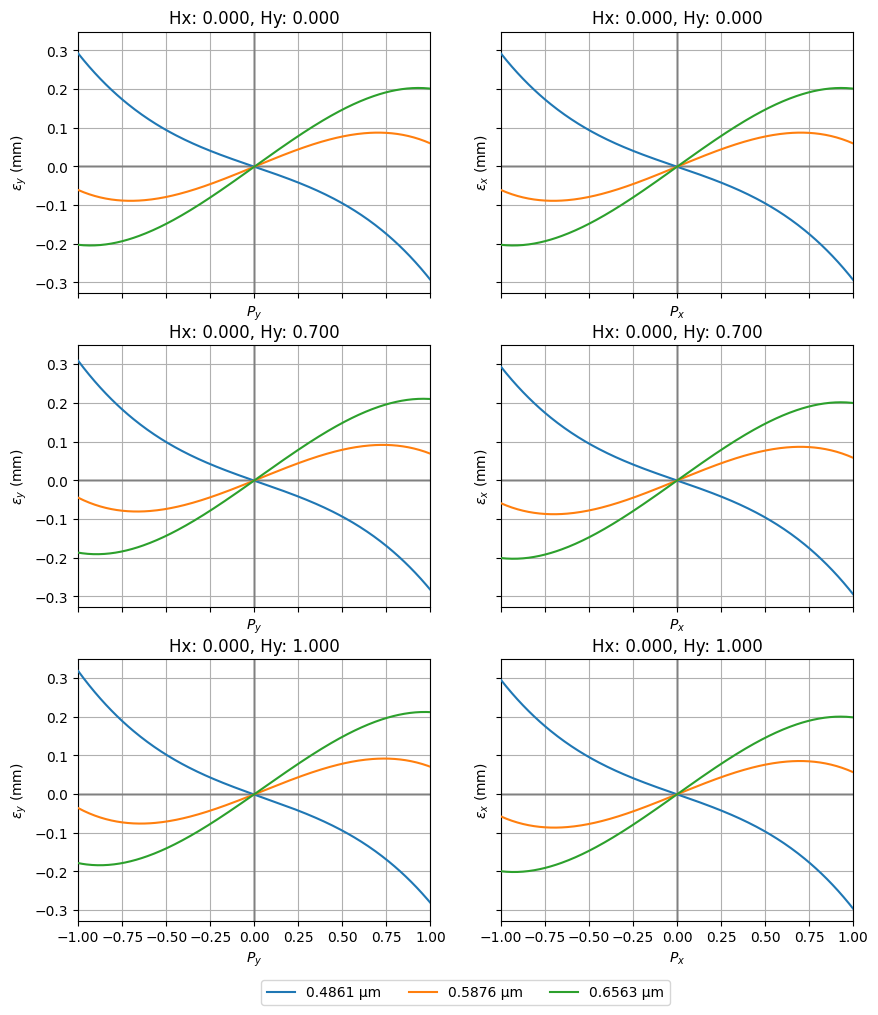

In [9]:
fan = analysis.RayFan(lens)
fan.view()

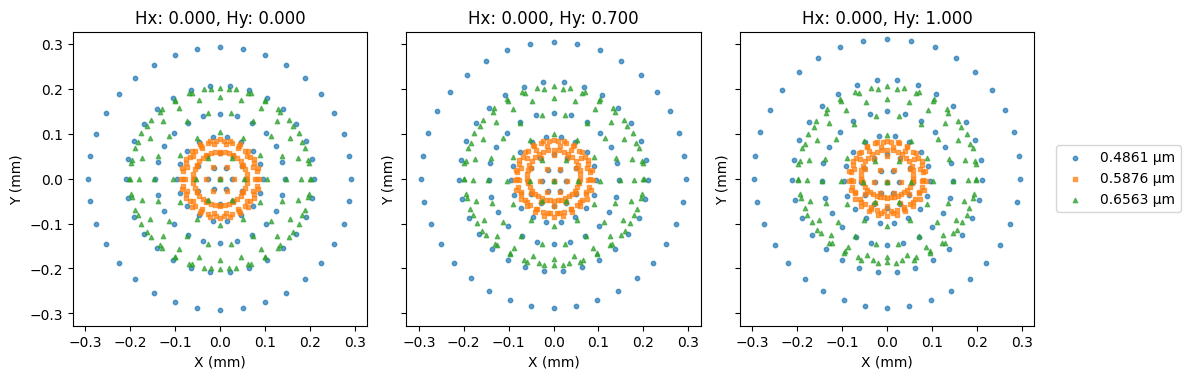

In [10]:
spot = analysis.SpotDiagram(lens)
spot.view()

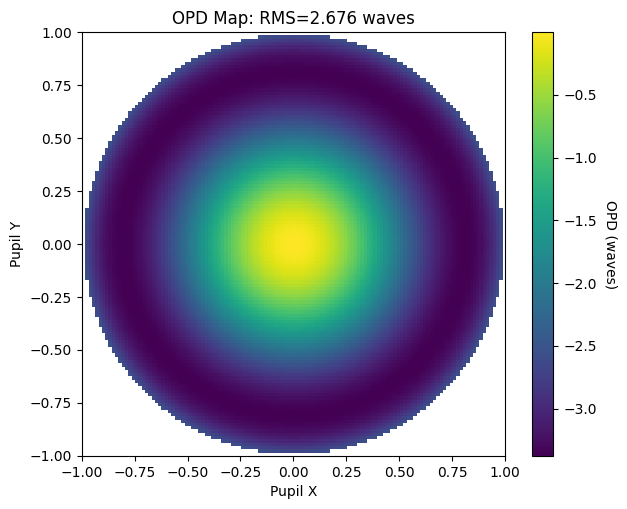

In [11]:
opd = wavefront.OPD(lens, field=(0, 0), wavelength=0.55)
opd.view(projection='2d', num_points=128)